In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [4]:
train[train['label']==0]

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first time in 2 years
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad


In [5]:
train[train['label']==1]

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenny #kentucky
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'm proud! #mailboxpride #liberalisme
31947,31948,1,@user @user you don't have the balls to hashtag me as a but you say i am to weasel away.. lumpy tony.. dipshit.
31948,31949,1,"makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!"


In [6]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [7]:
train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

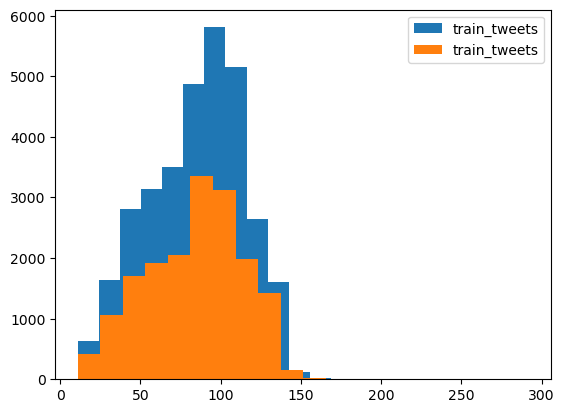

In [8]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train,bins = 20,label = "train_tweets")
plt.hist(length_test,bins = 20,label = "train_tweets")
plt.legend()
plt.show()

In [9]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [10]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [11]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(49159, 3)

In [12]:
def remove_pattern(input_text,pattern):
    r = re.findall(pattern,input_text)
    for i in r:
        input_text = re.sub(i, '',input_text)
    return input_text    

In [13]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [14]:
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z#]', ' ', text)
    return cleaned_text

combi['tidy_tweet'] = combi['tidy_tweet'].apply(clean_text)

combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [15]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [16]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [17]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [18]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet

0                                                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1                                    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                                                              [bihday, your, majesti]
3                                                                                     [#model, love, take, with, time]
4                                                                                         [factsguid, societi, #motiv]
                                                             ...                                                      
49154                   [thought, factori, left, right, polaris, #trump, #uselect, #leadership, #polit, #brexit, #blm]
49155                            [feel, like, mermaid, #hairflip, #neverreadi, #formal, #wed, #gown, #dress, #mermaid]
49156    [#hillari, #campaign, today, #ohio, use

In [19]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet  

In [20]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


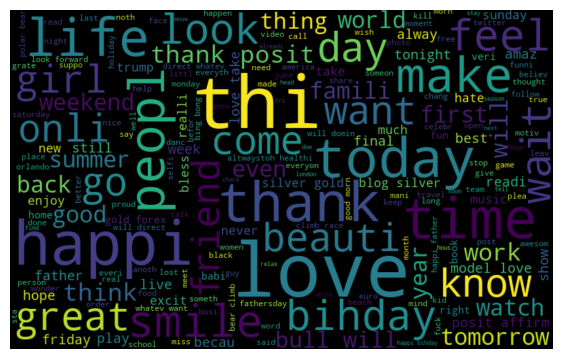

In [21]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

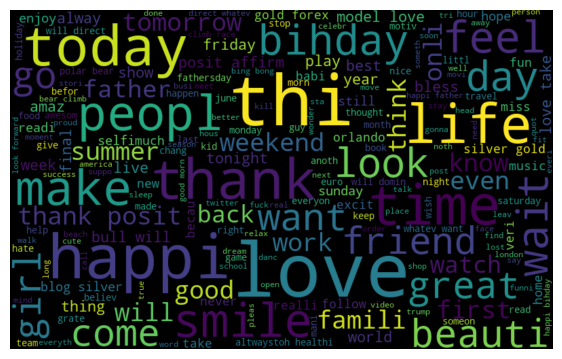

In [22]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

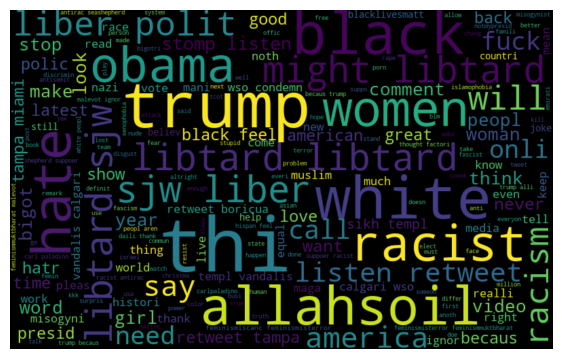

In [23]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [25]:
bow_vectorizer = CountVectorizer(max_df = 0.9,min_df = 2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [27]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,
    window=5,
    min_count=2, 
    sg=1,
    hs=0,
    negative=10,
    workers=2,
    seed=34
)
model_w2v.train(tokenized_tweet,total_examples=len(combi['tidy_tweet']),epochs=20)

(6510656, 7536020)

In [28]:
model_w2v.wv.most_similar(positive='dinner')

[('cookout', 0.5433107614517212),
 ('spaghetti', 0.5294777750968933),
 ('dess', 0.524154007434845),
 ('#pasta', 0.5226055979728699),
 ('lukey', 0.5223546624183655),
 ('spinach', 0.5167452692985535),
 ('#biall', 0.5139600038528442),
 ('aladdin', 0.5107453465461731),
 ('noodl', 0.5103573799133301),
 ('#avocado', 0.5098074078559875)]

In [29]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5879651308059692),
 ('phoni', 0.5418200492858887),
 ('#delegaterevolt', 0.537465512752533),
 ('tomlin', 0.5349310636520386),
 ('unstabl', 0.5343111157417297),
 ('potu', 0.5327300429344177),
 ('businessman', 0.5263992547988892),
 ('melo', 0.5204063653945923),
 ('unfavor', 0.5188594460487366),
 ('hillari', 0.5142228007316589)]

In [30]:
model_w2v.wv['food']

array([-6.44272147e-03, -7.25972235e-01,  2.40099713e-01, -2.77642637e-01,
       -1.94113478e-01, -1.56621286e-03,  8.92330334e-02, -1.15057707e+00,
       -2.19840840e-01, -1.52201962e+00,  1.68964341e-01, -9.67053175e-02,
       -7.81244189e-02,  2.85799384e-01, -3.65053207e-01,  3.65437984e-01,
        3.42110604e-01, -1.37860149e-01, -2.68971890e-01, -3.79778594e-01,
       -3.95540863e-01,  9.17068362e-01, -2.44456962e-01,  7.29307353e-01,
       -4.81310576e-01, -4.24198061e-01, -3.79513174e-01, -1.24950126e-01,
        3.37633997e-01,  3.25388312e-01,  2.52209306e-01, -6.82632208e-01,
        5.04094183e-01,  5.15569150e-02,  6.45761788e-02, -8.86159837e-02,
        4.57210362e-01,  1.17260329e-01,  7.06619620e-01, -8.49315971e-02,
       -7.68316865e-01,  3.82607669e-01, -6.90974116e-01,  8.79410744e-01,
       -4.27312493e-01, -9.61008519e-02, -1.10481821e-01,  5.77278554e-01,
       -1.18172908e+00, -1.10597163e-02, -3.72695506e-01, -7.15146899e-01,
        3.86303842e-01,  

In [31]:
len(model_w2v.wv['food'])

200

In [32]:
def word_vector(tokens,size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1,size))
            count +=1
        except KeyError:continue
    if count!=0:
        vec /= count
    return vec

In [33]:
wordvec_arrays = np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i],200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

In [34]:
#Doc2Vec Embedding
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import TaggedDocument

In [35]:
combi[:6]

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talk befor they leav chao disput when they there #allshowandnogo


In [36]:
def add_label(twt):
    output=[]
    for i,s in zip(twt.index,twt):
        output.append(TaggedDocument(s,["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet)

In [37]:
labeled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [38]:
model_d2v = gensim.models.Doc2Vec(
    dm=1,          # Distributed Memory (PV-DM) model
    dm_mean=1,     # Use mean of context word vectors (ignored when dm=0)
    vector_size=200, # Dimensionality of the feature vectors
    window=5,      # Maximum distance between the predicted word and context words
    negative=7,    # Number of negative samples to be drawn during training
    min_count=5,   # Ignores all words with a total frequency lower than this
    workers=3,     # Number of CPU cores to use when training the model
    alpha=0.1,     # Initial learning rate
    seed=23        # Seed for the random number generator
)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets,total_examples=len(combi['tidy_tweet']),epochs=15)

100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 1588173.42it/s]


In [39]:
docvec_arrays = np.zeros((len(tokenized_tweet),200))
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [41]:
#BOW Features
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

Xtrain_bow,Xvalid_bow,ytrain,yvalid = train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

lreg = LogisticRegression()
lreg.fit(Xtrain_bow,ytrain)
prediction = lreg.predict(Xvalid_bow)
prediction_int = (prediction >= 0.3).astype(int)

f1_score(yvalid,prediction_int)

0.48262164846077454

In [42]:
test_pred = lreg.predict_proba(test_bow)[:,1]
test_pred_int = (test_pred >= 0.3).astype(int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv',index=False)

In [43]:
#TF-IDF Features
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

Xtrain_tfidf, Xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(Xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(Xvalid_tfidf)[:,1]
prediction_int = (prediction >= 0.3).astype(int)

f1_score(yvalid,prediction_int)

0.5451327433628319

In [44]:
#Word2Vec Features
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

Xtrain_w2v, Xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(Xtrain_w2v, ytrain)

prediction = lreg.predict_proba(Xvalid_w2v)[:,1]
prediction_int = (prediction >= 0.3).astype(int)

f1_score(yvalid,prediction_int)

0.6088888888888889

In [45]:
#Doc2Vec Features
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]

Xtrain_d2v, Xvalid_d2v, ytrain, yvalid = train_test_split(train_d2v, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(Xtrain_d2v, ytrain)

prediction = lreg.predict_proba(Xvalid_d2v)[:,1]
prediction_int = (prediction >= 0.3).astype(int)

f1_score(yvalid,prediction_int)

0.3710801393728223

In [46]:
from sklearn import svm

In [47]:
#BOW Features
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(Xtrain_bow,ytrain)
prediction=svc.predict_proba(Xvalid_bow)
prediction_int = (prediction[:,1] >= 0.3).astype(int)
f1_score(yvalid,prediction_int)

0.5092936802973977

In [48]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = (test_pred[:,1] >= 0.3).astype(int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_svm_bow.csv',index=False)

In [49]:
#TF-IDF Feature
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(Xtrain_tfidf,ytrain)
prediction=svc.predict_proba(Xvalid_tfidf)
prediction_int = (prediction[:,1] >= 0.3).astype(int)
f1_score(yvalid,prediction_int)

0.5104831358249772

In [50]:
#W2V Feature
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(Xtrain_w2v,ytrain)
prediction=svc.predict_proba(Xvalid_w2v)
prediction_int = (prediction[:,1] >= 0.3).astype(int)
f1_score(yvalid,prediction_int)

0.6147859922178989

In [51]:
#D2V Feature
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(Xtrain_d2v,ytrain)
prediction=svc.predict_proba(Xvalid_d2v)
prediction_int = (prediction[:,1] >= 0.3).astype(int)
f1_score(yvalid,prediction_int)

0.14814814814814817

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
#BOW
rf = RandomForestClassifier(n_estimators=400,random_state=11).fit(Xtrain_bow,ytrain)
prediction = rf.predict(Xvalid_bow)
f1_score(yvalid,prediction)

0.5529225908372828

In [54]:
#TF-IDF
rf = RandomForestClassifier(n_estimators=400,random_state=11).fit(Xtrain_tfidf,ytrain)
prediction = rf.predict(Xvalid_tfidf)
f1_score(yvalid,prediction)

0.562152133580705

In [55]:
#W2V
rf = RandomForestClassifier(n_estimators=400,random_state=11).fit(Xtrain_w2v,ytrain)
prediction = rf.predict(Xvalid_w2v)
f1_score(yvalid,prediction)

0.5185185185185185

In [57]:
#D2V
rf = RandomForestClassifier(n_estimators=400,random_state=11).fit(Xtrain_d2v,ytrain)
prediction = rf.predict(Xvalid_d2v)
f1_score(yvalid,prediction)

0.045714285714285714

In [58]:
from xgboost import XGBClassifier

In [59]:
#BOW 
xgb_model = XGBClassifier(max_depth = 6,n_estimators = 1000).fit(Xtrain_bow,ytrain)
prediction = xgb_model.predict(Xvalid_bow)
f1_score(yvalid,prediction)

0.5268915223336372

In [60]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv',index=False)

In [61]:
#TFIDF
xgb_model = XGBClassifier(max_depth = 6,n_estimators = 1000).fit(Xtrain_tfidf,ytrain)
prediction = xgb_model.predict(Xvalid_tfidf)
f1_score(yvalid,prediction)

0.5451263537906137

In [62]:
#W2V
xgb_model = XGBClassifier(max_depth = 6,n_estimators = 1000).fit(Xtrain_w2v,ytrain)
prediction = xgb_model.predict(Xvalid_w2v)
f1_score(yvalid,prediction)

0.6713780918727914

In [63]:
#D2V
xgb_model = XGBClassifier(max_depth = 6,n_estimators = 1000).fit(Xtrain_d2v,ytrain)
prediction = xgb_model.predict(Xvalid_d2v)
f1_score(yvalid,prediction)

0.34705228031145713

In [64]:
import xgboost as xgb

In [65]:
dtrain = xgb.DMatrix(Xtrain_w2v,label=ytrain)
dvalid = xgb.DMatrix(Xvalid_w2v,label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [66]:
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight':1,
    'ets':.3,
    'subsample':1,
    'colsample_bytree':1
}

In [67]:
def custom_eval(preds,dtrain):
    labels = dtrain.get_label().astype(int)
    preds = (preds>=0.3).astype(int)
    return [('f1_score',f1_score(labels,preds))]